### The CIFAR-10 dataset consists of 60,000 color images, each of size 32x32 pixels, categorized into 10 different classes. Each class represents a specific object or category. The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

#### Sources
https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
https://www.youtube.com/watch?v=zfiSAzpy9NM

### The dataset is divided into two subsets: a training set and a test set. The training set contains 50,000 images, while the test set contains 10,000 images. These images are pre-labeled with their corresponding class labels.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

In [2]:
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)  # Prints the shape of the train dataset
print(y_train.shape)  # Prints the shape of the train labels
print(X_test.shape)  # Prints the shape of the test dataset
print(y_test.shape)  # Prints the shape of the test labels

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Get the unique class labels
class_labels = list(set(y_train.flatten()))
class_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
labels = y_test.flatten()
labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

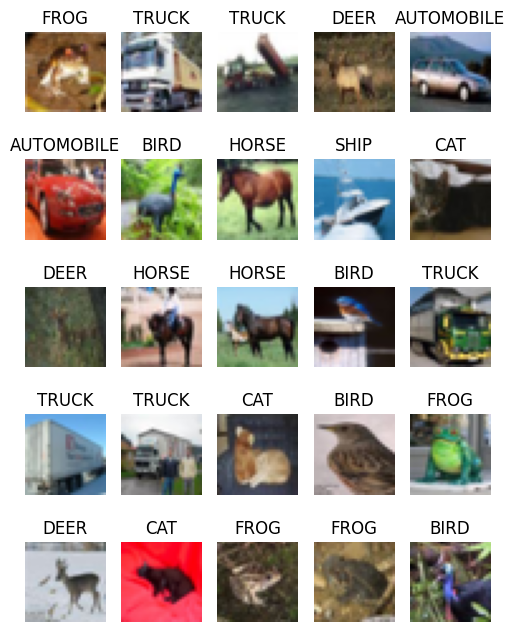

In [7]:
# Load the CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Define the class names
class_names = ['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']

# Display some images with their corresponding class labels
plt.figure(figsize=(6,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

## Training Neural Network

In [8]:
print(X_train.shape)
print(X_train.reshape(X_train.shape[0], 32, 32, 3))

(50000, 32, 32, 3)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  

In [9]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# before normalization, it is better to convert into float. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# normalizing the data to help with the training. Pixel values to be in between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# one-hot encoding using keras' numpy-related utilities
# In this case, there are 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).
n_classes = 10

#The 'to_categorical' function converts the integer labels into binary vectors of length 'n_classes', where 
#each vector represents the corresponding label. 

print("Shape before one-hot encoding (y_train): ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
print("Shape after one-hot encoding (Y_train): ", Y_train.shape)

print("Shape before one-hot encoding (y_test): ", y_test.shape)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding (Y_test): ", Y_test.shape)

Shape before one-hot encoding (y_train):  (50000, 1)
Shape after one-hot encoding (Y_train):  (50000, 10)
Shape before one-hot encoding (y_test):  (10000, 1)
Shape after one-hot encoding (Y_test):  (10000, 10)


In [12]:
# building a linear stack of layers with the sequential model.
# The `Sequential` model is a linear stack of layers where each layer is added one after another. 

# Initialize an empty sequential model.
model = Sequential()

# convolutional layer
#Adding a convolutional layer with 50 filters, a kernel size of (3,3), a stride of (1,1), and 'same' padding. 
# with activation function ReLU. The input shape is (32, 32, 3) so that the model expects images of size 32x32x3. 

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Addition of another convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# Addition of a max pooling layer with a size of (2,2). This layer reduces the spatial dimensions of the input 
#by taking the maximum value in each 2x2 region.
model.add(MaxPool2D(pool_size=(2,2)))

#Addition of a dropout layer to randomly set a fraction (25%) of input units to 0 at each update during training. 
#This helps prevent overfitting.
model.add(Dropout(0.25))

#  The same pattern of adding a convolutional layer, max pooling layer, and dropout layer is repeated with different 
#parameters for the third layer.
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Addition of a flattened layer that converts the 3D output from the previous layer into a 1D vector. 
# This is necessary to connect the convolutional layers to the fully connected layers.
# flatten output of conv
model.add(Flatten())

# hidden layer
# Adds a fully connected layer with 500 units and ReLU activation.
model.add(Dense(500, activation='relu'))

# Adds a dropout layer that randomly sets a fraction (40%) of input units to 0 at each update during training.
model.add(Dropout(0.4))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer. Softmax is used because we have 10 classes. 
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs and save the history
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 106s 269ms/step - loss: 1.5984 - accuracy: 0.4128 - val_loss: 1.1772 - val_accuracy: 0.5818
Epoch 2/10
391/391 [==============================] - 103s 265ms/step - loss: 1.1205 - accuracy: 0.6023 - val_loss: 0.9110 - val_accuracy: 0.6813
Epoch 3/10
391/391 [==============================] - 106s 270ms/step - loss: 0.9334 - accuracy: 0.6733 - val_loss: 0.8507 - val_accuracy: 0.7128
Epoch 4/10
391/391 [==============================] - 104s 265ms/step - loss: 0.8209 - accuracy: 0.7136 - val_loss: 0.7872 - val_accuracy: 0.7218
Epoch 5/10
391/391 [==============================] - 104s 267ms/step - loss: 0.7368 - accuracy: 0.7418 - val_loss: 0.7264 - val_accuracy: 0.7464
Epoch 6/10
391/391 [==============================] - 110s 281ms/step - loss: 0.6692 - accuracy: 0.7648 - val_loss: 0.6860 - val_accuracy: 0.7658
Epoch 7/10
391/391 [==============================] - 108s 275ms/step - loss: 0.6154 - accuracy: 0.7846 - val_loss: 0.6722 -

In [13]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 75)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 125)         0         
 g2D)                                                   

https://colab.research.google.com/github/Askinkaty/IntroDL/blob/master/CNN_on_CIFAR_10.ipynb

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

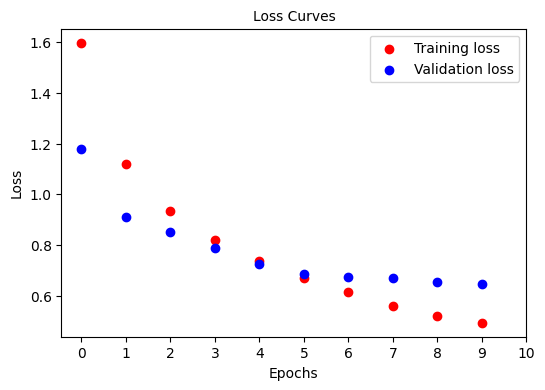

In [27]:
plt.figure(figsize=[6,4])
plt.scatter(range(len(history.history['loss'])), history.history['loss'], color='r', marker='o', label='Training loss')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], color='b', marker='o', label='Validation loss')
plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=10)
plt.xticks(range(11))  # Set x-axis ticks from 0 to 10
plt.show()

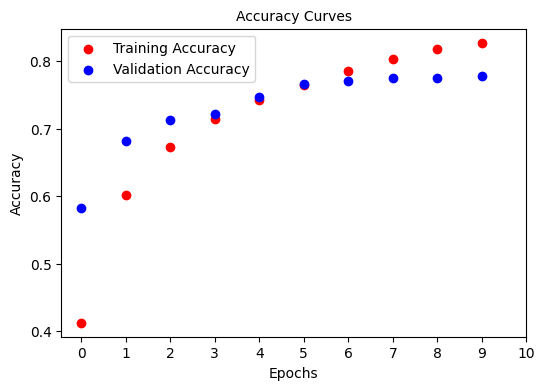

In [28]:
plt.figure(figsize=[6,4])
plt.scatter(range(len(history.history['accuracy'])), history.history['accuracy'], color='r', marker='o', label='Training Accuracy')
plt.scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], color='b', marker='o', label='Validation Accuracy')
plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=10)
plt.xticks(range(11))  # Set x-axis ticks from 0 to 10
plt.show()

Text(0.5, 1.0, 'Loss Curves')

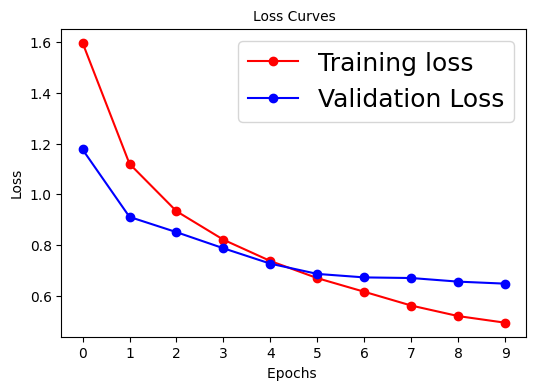

In [34]:
plt.figure(figsize=[6,4])
plt.xticks(range(11))  # Set x-axis ticks from 0 to 10
plt.plot(history.history['loss'],'r',marker='o')
plt.plot(history.history['val_loss'],'b',marker='o')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)

Text(0.5, 1.0, 'Accuracy Curves')

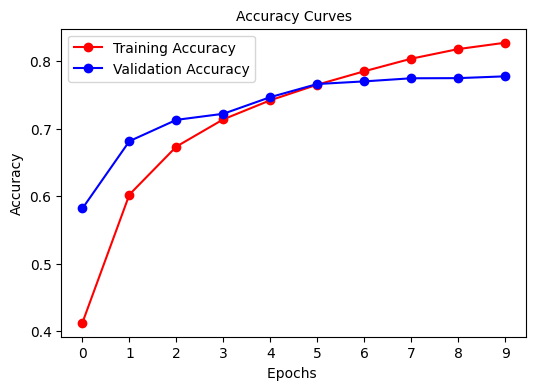

In [35]:
plt.figure(figsize=[6,4])
plt.xticks(range(11))  # Set x-axis ticks from 0 to 10
plt.plot(history.history['accuracy'],'r',marker='o')
plt.plot(history.history['val_accuracy'],'b',marker='o')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)